In [2]:
#importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
!pip install wordcloud
from wordcloud import WordCloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   --------- ------------------------------ 71.7/300.2 kB 1.9 MB/s eta 0:00:01
   ------------ --------------------------- 92.2/300.2 kB 1.7 MB/s eta 0:00:01
   ------------ --------------------------- 92.2/300.2 kB 1.7 MB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 654.9 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 654.9 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 654.9 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/300.2 kB 523.5 kB/s eta 0:00:01
   ----------------------------- -------- 235.5/300.2 kB 600.7 kB/s eta 0:00:01
   ------------------------------------ - 286.7/300.2 kB 679.3 kB/s eta 0:00:01


In [3]:
#loading the data

data = pd.read_csv("Nigeria_1997-2024_Sep20.csv")

In [4]:
data.head(10)

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,NIG38575,2024-09-20,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),Refugees/IDPs (Nigeria),6,...,Bolori,11.8826,13.0890,1,Whatsapp,New media,"On 20 September 2024, IDPs (flood victims) fro...",0,crowd size=no report,1727134598
1,NIG38585,2024-09-20,2024,2,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),Muslim Group (Nigeria),6,...,Ile-Ife,7.4824,4.5603,1,Daily Trust (Nigeria),National,"Around 20 September 2024 (as reported), hundre...",0,crowd size=hundreds,1727134598
2,NIG38581,2024-09-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),NaN,6,...,Agodi,7.4035,3.9132,1,Daily Post (Nigeria); Guardian (Nigeria); Saha...,National-Regional,"On 19 September 2024, for a second consecutive...",0,crowd size=hundreds,1727134598
3,NIG38588,2024-09-19,2024,1,Strategic developments,Strategic developments,Disrupted weapons use,Police Forces of Nigeria (2023-),NaN,1,...,Buruku,10.6179,7.2331,1,Daily Post (Nigeria); Nigeria Punch,National,"Weapons seizure: On 19 September 2024, Police ...",0,NaN,1727134598
4,NIG38591,2024-09-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),PDP: People's Democratic Party,6,...,Wanno,7.1389,6.5724,1,Vanguard (Nigeria),National,"On 19 September 2024, PDP youths protested at ...",0,crowd size=no report,1727134598
5,NIG38626,2024-09-19,2024,1,Political violence,Battles,Armed clash,Police Forces of Nigeria (2023-),Kurfi Communal Militia (Nigeria),1,...,Kurfi,12.6684,7.4841,2,Twitter,New media,"On 19 September 2024, police and Kurfi defense...",10,NaN,1727134598
6,NIG38579,2024-09-18,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),Women (Nigeria),6,...,Nsukka,6.8561,7.3927,1,Sahara Reporters; Sun (Nigeria),National-Regional,"On 18 September 2024, over 1000 Eha-Alumona wo...",0,crowd size=over 1000,1727134598
7,NIG38580,2024-09-18,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),NaN,6,...,Agodi,7.4035,3.9132,1,Daily Post (Nigeria); Sahara Reporters,National-Regional,"On 18 September 2024, hundreds of residents pr...",0,crowd size=hundreds,1727134598
8,NIG38593,2024-09-18,2024,1,Political violence,Riots,Mob violence,Rioters (Nigeria),Labor Group (Nigeria),5,...,Obalende,6.4444,3.3929,1,Vanguard (Nigeria),National,"On 18 September 2024, commercial drivers attac...",0,crowd size=no report,1727134598
9,NIG38568,2024-09-17,2024,1,Political violence,Battles,Armed clash,Military Forces of Nigeria (2023-),NaN,1,...,Alawa,10.3228,6.6542,2,Daily Independent (Nigeria); Daily Leadership ...,National,"On 17 September 2024, the Nigerian troops clas...",2,NaN,1727134598


In [5]:
data.columns

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'region', 'country',
       'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'tags', 'timestamp'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38076 entries, 0 to 38075
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id_cnty       38076 non-null  object 
 1   event_date          38076 non-null  object 
 2   year                38076 non-null  int64  
 3   time_precision      38076 non-null  int64  
 4   disorder_type       38076 non-null  object 
 5   event_type          38076 non-null  object 
 6   sub_event_type      38076 non-null  object 
 7   actor1              38076 non-null  object 
 8   assoc_actor_1       10199 non-null  object 
 9   inter1              38076 non-null  int64  
 10  actor2              29525 non-null  object 
 11  assoc_actor_2       8803 non-null   object 
 12  inter2              38076 non-null  int64  
 13  interaction         38076 non-null  int64  
 14  civilian_targeting  14964 non-null  object 
 15  iso                 38076 non-null  int64  
 16  regi

In [7]:
data.shape

(38076, 31)

In [8]:
#checking for missing values in every column
data.isna().sum()


event_id_cnty             0
event_date                0
year                      0
time_precision            0
disorder_type             0
event_type                0
sub_event_type            0
actor1                    0
assoc_actor_1         27877
inter1                    0
actor2                 8551
assoc_actor_2         29273
inter2                    0
interaction               0
civilian_targeting    23112
iso                       0
region                    0
country                   0
admin1                    1
admin2                    1
admin3                38076
location                  0
latitude                  0
longitude                 0
geo_precision             0
source                    0
source_scale              0
notes                     0
fatalities                0
tags                  30562
timestamp                 0
dtype: int64

In [9]:
data.describe()

,year,time_precision,inter1,inter2,interaction,iso,admin3,latitude,longitude,geo_precision,fatalities,timestamp
count,38076.000000,38076.000000,38076.000000,38076.000000,38076.000000,38076.000000,0.0,38076.000000,38076.000000,38076.000000,38076.000000,3.807600e+04
mean,2018.643502,1.109439,3.566210,3.779914,36.497085,565.990493,NaN,8.760764,7.907555,1.369078,3.151723,1.677538e+09
std,5.312043,0.325537,1.717226,2.963821,17.550438,1.855167,NaN,2.611340,2.956555,0.516271,14.875568,5.034708e+07
min,1997.000000,1.000000,1.000000,0.000000,10.000000,204.000000,NaN,2.855900,1.328200,1.000000,0.000000,1.552576e+09
25%,2016.000000,1.000000,2.000000,1.000000,16.000000,566.000000,NaN,6.453100,6.078900,1.000000,0.000000,1.653503e+09
50%,2020.000000,1.000000,3.000000,4.000000,37.000000,566.000000,NaN,8.700000,7.352600,1.000000,0.000000,1.702343e+09
75%,2022.000000,1.000000,5.000000,7.000000,50.000000,566.000000,NaN,11.200200,8.900000,2.000000,2.000000,1.713223e+09
max,2024.000000,3.000000,8.000000,8.000000,88.000000,566.000000,NaN,13.832400,14.650000,3.000000,1000.000000,1.727135e+09


In [17]:
#dropping irrelevant columns with missing values
data = data.drop(['tags', 'admin3','civilian_targeting','assoc_actor_2','assoc_actor_1','actor2'], axis=1)

In [18]:
#droping rows with missing values
data_cleaned = data.dropna()

In [21]:
#make a copy of the dataframe
data_cleaned = data_cleaned.copy()
# convert 'event date' column to datetime format
data_cleaned ['event_date'] = pd.to_datetime(data_cleaned ['event_date'], errors='coerce')

# Extract month and day into new columns
data_cleaned ['Month'] = data_cleaned ['event_date'].dt.month
data_cleaned ['Day'] = data_cleaned ['event_date'].dt.day

In [27]:
#checking for duplicates
data_cleaned.duplicated().sum()

0

In [22]:
data_cleaned.shape

(38075, 27)

In [23]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38075 entries, 0 to 38075
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_id_cnty   38075 non-null  object        
 1   event_date      38075 non-null  datetime64[ns]
 2   year            38075 non-null  int64         
 3   time_precision  38075 non-null  int64         
 4   disorder_type   38075 non-null  object        
 5   event_type      38075 non-null  object        
 6   sub_event_type  38075 non-null  object        
 7   actor1          38075 non-null  object        
 8   inter1          38075 non-null  int64         
 9   inter2          38075 non-null  int64         
 10  interaction     38075 non-null  int64         
 11  iso             38075 non-null  int64         
 12  region          38075 non-null  object        
 13  country         38075 non-null  object        
 14  admin1          38075 non-null  object        
 15  admin2 

In [24]:
data_cleaned.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,inter1,inter2,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,Month,Day
0,NIG38575,2024-09-20,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,0,...,11.8826,13.0890,1,Whatsapp,New media,"On 20 September 2024, IDPs (flood victims) fro...",0,1727134598,9,20
1,NIG38585,2024-09-20,2024,2,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,0,...,7.4824,4.5603,1,Daily Trust (Nigeria),National,"Around 20 September 2024 (as reported), hundre...",0,1727134598,9,20
2,NIG38581,2024-09-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,0,...,7.4035,3.9132,1,Daily Post (Nigeria); Guardian (Nigeria); Saha...,National-Regional,"On 19 September 2024, for a second consecutive...",0,1727134598,9,19
3,NIG38588,2024-09-19,2024,1,Strategic developments,Strategic developments,Disrupted weapons use,Police Forces of Nigeria (2023-),1,4,...,10.6179,7.2331,1,Daily Post (Nigeria); Nigeria Punch,National,"Weapons seizure: On 19 September 2024, Police ...",0,1727134598,9,19
4,NIG38591,2024-09-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,0,...,7.1389,6.5724,1,Vanguard (Nigeria),National,"On 19 September 2024, PDP youths protested at ...",0,1727134598,9,19


In [28]:
data_cleaned.to_csv('cleaned_data_crime_rate.csv', index=False)

 <span style="font-size:20px">Exploratory Data Analysis</span>

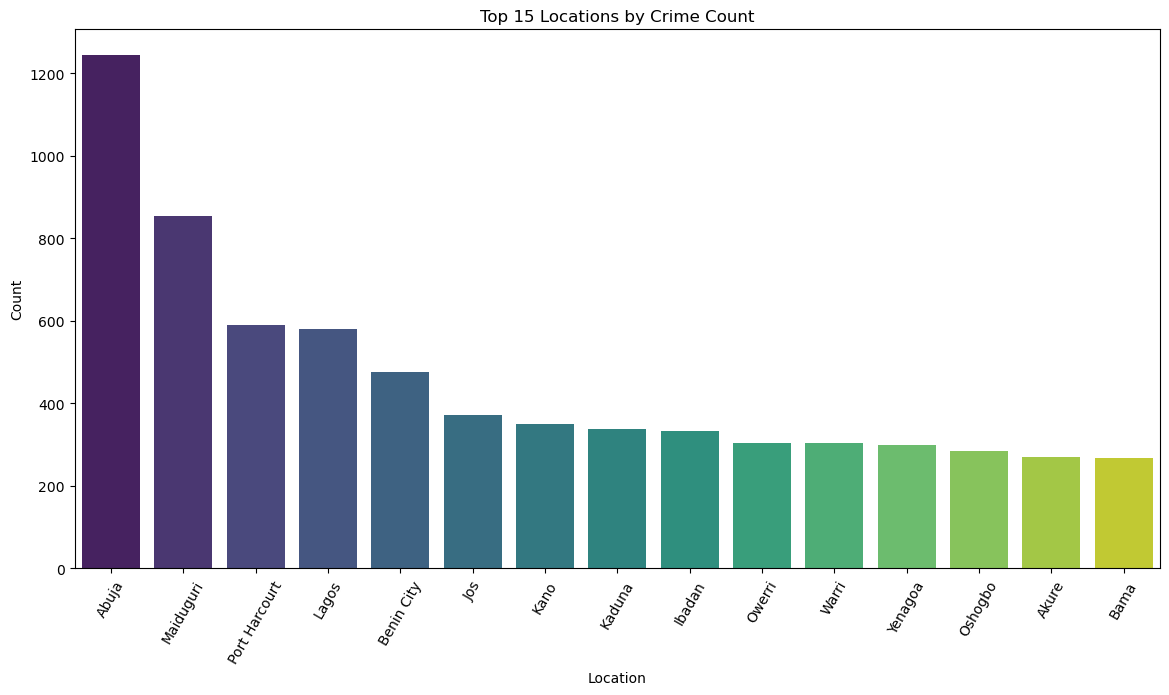

In [47]:
# Where do Most Crime Occur?

plt.figure(figsize=(14, 7))
sns.countplot(
    x=data_cleaned['location'], 
    order=data_cleaned['location'].value_counts().iloc[:15].index, 
    palette="viridis"
)
plt.xticks(rotation=60) 
plt.xlabel("Location")
plt.ylabel("Count")
plt.title("Top 15 Locations by Crime Count")
plt.show()

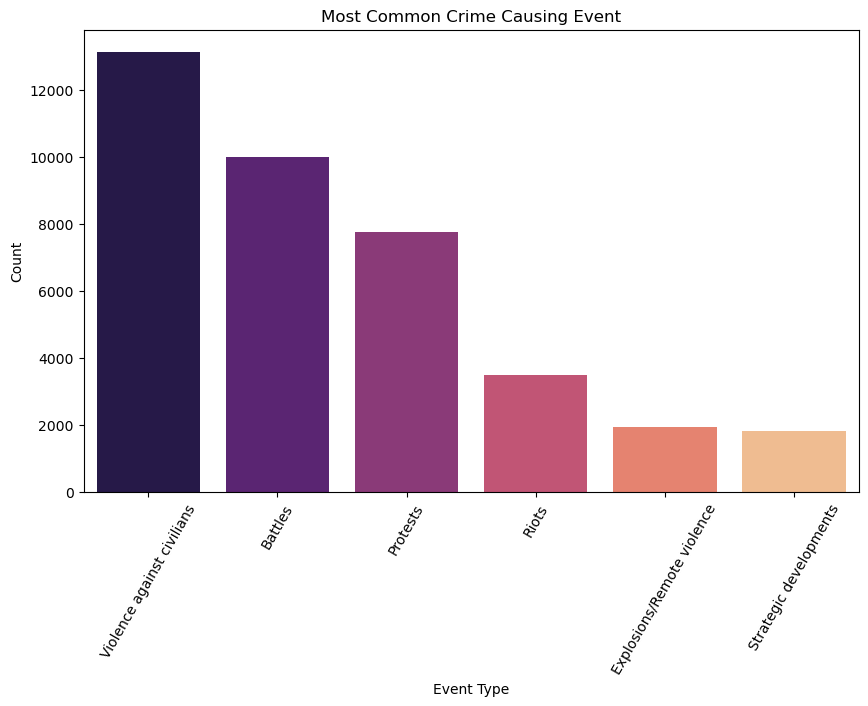

In [48]:
# What event leads to most crime?

# Setting up the figure size
plt.figure(figsize=(10, 6))

# Plotting the counts of each event type
sns.countplot(
    x=data_cleaned['event_type'], 
    data=data_cleaned, 
    order=data_cleaned['event_type'].value_counts().index, 
    palette="magma"
)

# Adding labels and title
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.title("Most Common Crime Causing Event")
plt.xticks(rotation=60)  # Rotate x-axis labels if they are long
plt.show()

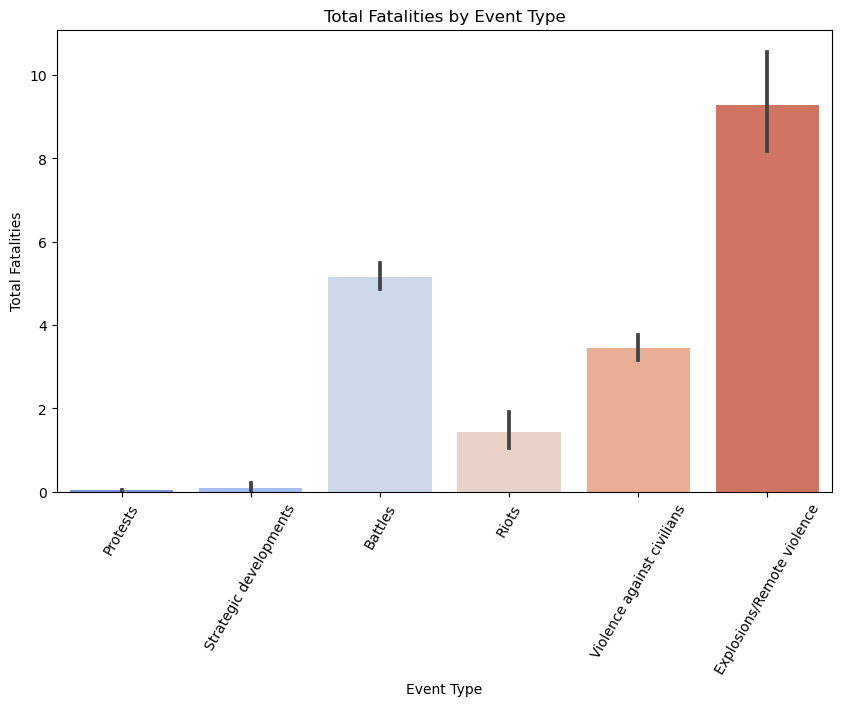

In [50]:
#What Event is the Deadliest?

# Group by 'Event Type' and sum the fatalities
fatalities_by_event = data_cleaned.groupby('event_type')['fatalities'].sum().reset_index()

# Sort by the number of fatalities in descending order
fatalities_by_event = fatalities_by_event.sort_values(by='fatalities', ascending=False)

# Setting up the figure size
plt.figure(figsize=(10, 6))

# Plotting the summed fatalities for each event type
sns.barplot(
    x=data_cleaned['event_type'], 
    y=data_cleaned['fatalities'], 
    data=fatalities_by_event, 
    palette="coolwarm"
)

# Adding labels and title
plt.xlabel("Event Type")
plt.ylabel("Total Fatalities")
plt.title("Total Fatalities by Event Type")
plt.xticks(rotation=60) 
plt.show()

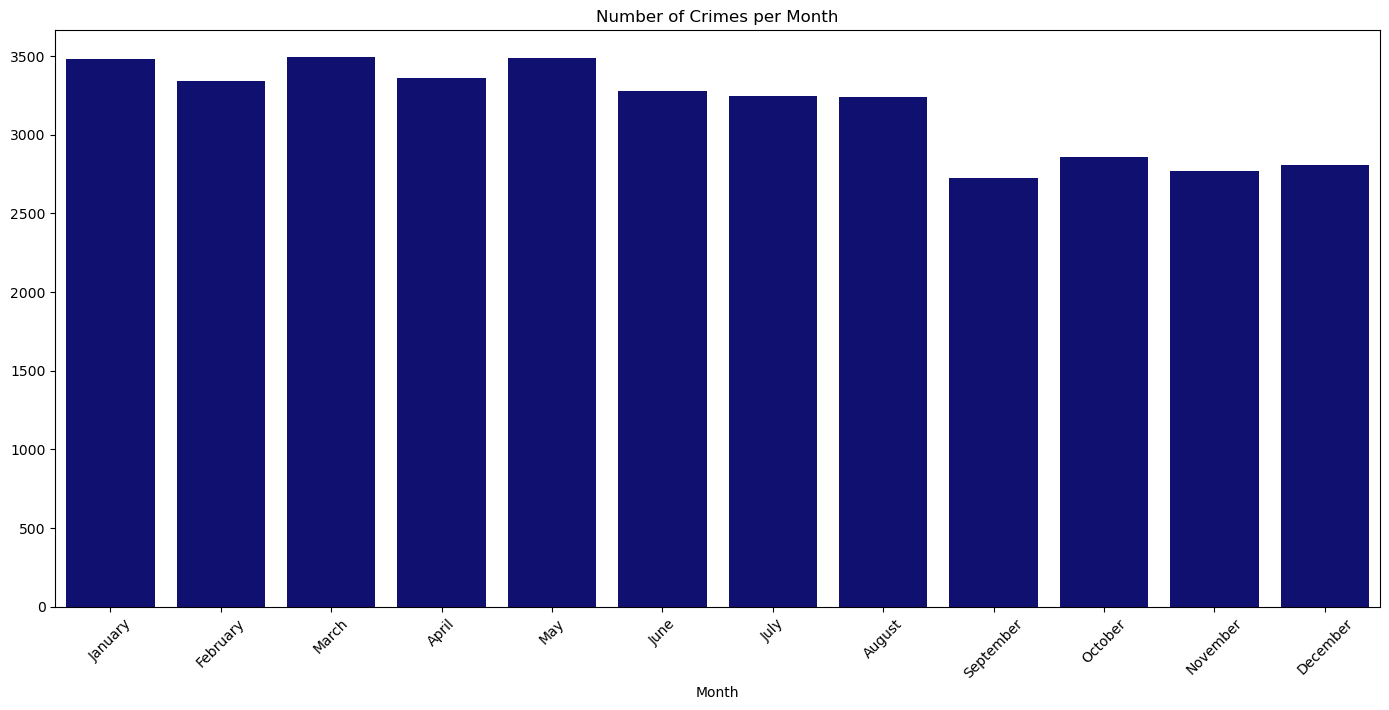

In [65]:
#Number of Crimes per Month

# Count occurrences of each month
month_counts = data_cleaned['Month'].value_counts().reindex(range(1, 13), fill_value=0)  

# Plotting
plt.figure(figsize=(14, 7))

sns.barplot(x=month_counts.index, y=month_counts.values, color='navy')

# Set x-ticks to correspond with month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(ticks=month_counts.index - 1, labels=month_names, rotation=45)  #

# Adjust layout to avoid label clipping
plt.tight_layout()
plt.title("Number of Crimes per Month")

plt.show()

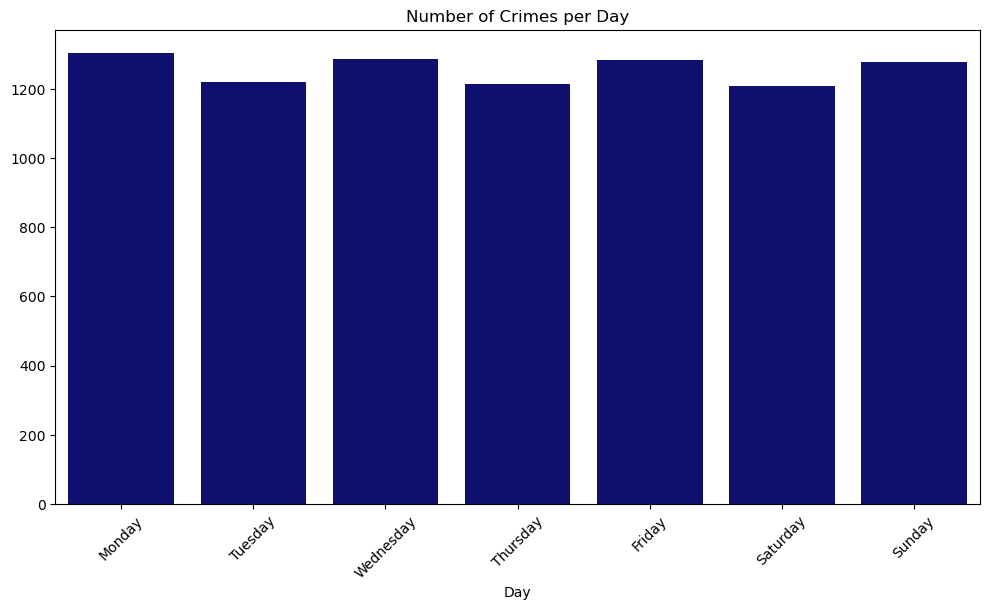

In [66]:
#Number of Crimes per Day

# Count occurrences of each day
day_counts = data_cleaned['Day'].value_counts().reindex(range(1, 8), fill_value=0)  

# Plotting
plt.figure(figsize=(10, 6))

sns.barplot(x=day_counts.index, y=day_counts.values, color='navy')

# Set x-ticks to correspond with month names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 
               'Sunday']
plt.xticks(ticks=day_counts.index - 1, labels=day_names, rotation=45)  #

# Adjust layout to avoid label clipping
plt.tight_layout()
plt.title("Number of Crimes per Day")
plt.show()

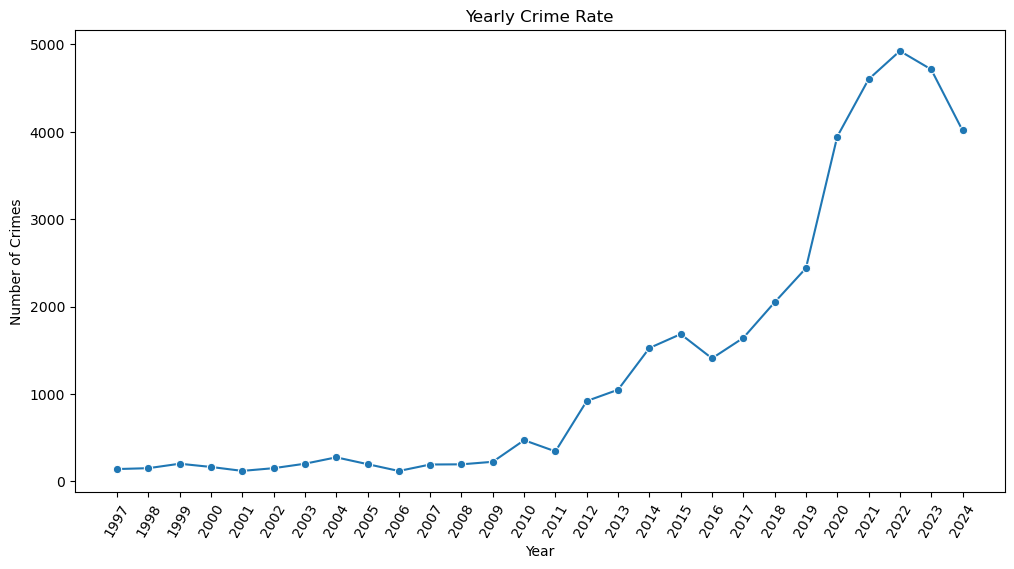

In [67]:
#Crime Rate per Year

# Group by year and count occurrences
yearly_crime_rate = data_cleaned['year'].value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_crime_rate.index, y=yearly_crime_rate.values, marker='o')
plt.title('Yearly Crime Rate')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(yearly_crime_rate.index,rotation=60)  # Show all years on the x-axis
plt.show()

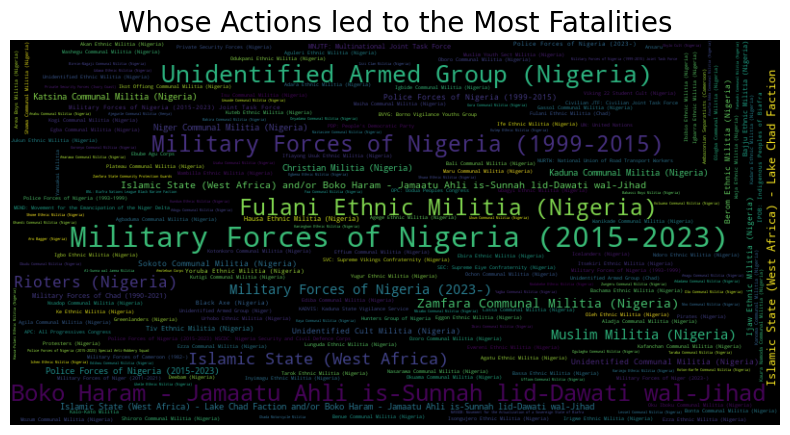

In [68]:
#Whose Actions Led to A lot of Fatalities?

# Step 1: Aggregate fatalities by actor
actor_fatalities = data_cleaned.groupby('actor1')['fatalities'].sum().reset_index()

# Step 2: Create a dictionary for the word cloud
word_freq = dict(zip(actor_fatalities['actor1'], actor_fatalities['fatalities']))

# Step 3: Generate the word cloud
wordcloud = WordCloud(
    background_color='black',
    width=800,
    height=400
).generate_from_frequencies(word_freq)

# Step 4: Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title("Whose Actions led to the Most Fatalities", fontsize=20, color='black')
plt.show()